# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
#data processing
import pandas as pd
import numpy as np

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# machine learning algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df=pd.read_csv('census.csv')

In [3]:
#checking the first 5 rows
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
#check features
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We have a dataset that contains census data and the objective of this project is to be able to predict whether the person surveyed has an income of over $50k in a year. Here, we need to build a binary prediction model.

The dataset has 32560 observations for 14 characteristics and target Income.

There are zero null values in the dataset.

Skewness can be seen in Captal gains, Capital loss attributes.

Ordinal data is present in Education, Education_num columns.

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Exploratory Data Analysis

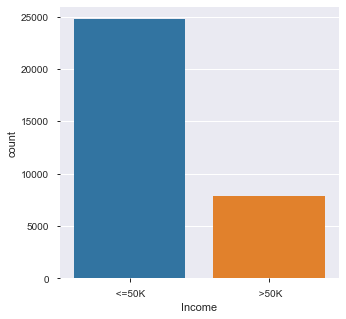

In [8]:
#univariate analysis on target Income 
plt.figure(figsize=(5,5))
sns.countplot('Income',data=df)

We see that majority of the population has income of 50k and less.

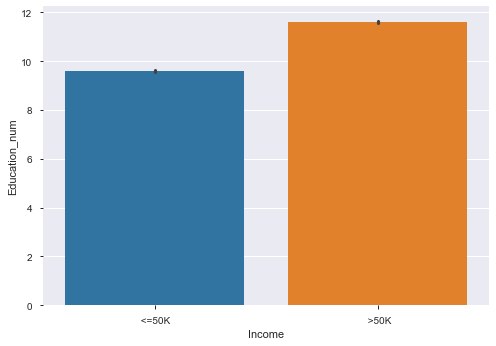

In [9]:
#bivariate analysis
sns.barplot(x="Income",y="Education_num", data=df)

Education has a direct bearing on the income levels. Higher the education levels, higher is the income bracket,

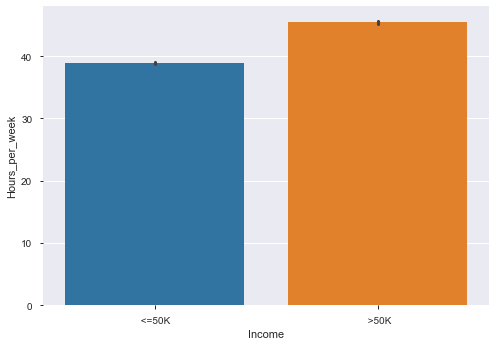

In [10]:
sns.barplot(x="Income",y="Hours_per_week", data=df)

People putting in more work-hours per week, earn above 50k.

Text(0, 0.5, 'Age')

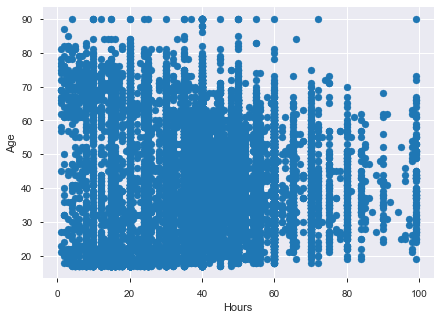

In [11]:
#bivariate analysis between hours and age
plt.figure(figsize=(7,5))
plt.scatter(x=df['Hours_per_week'],y=df['Age'])
plt.xlabel('Hours')
plt.ylabel('Age')

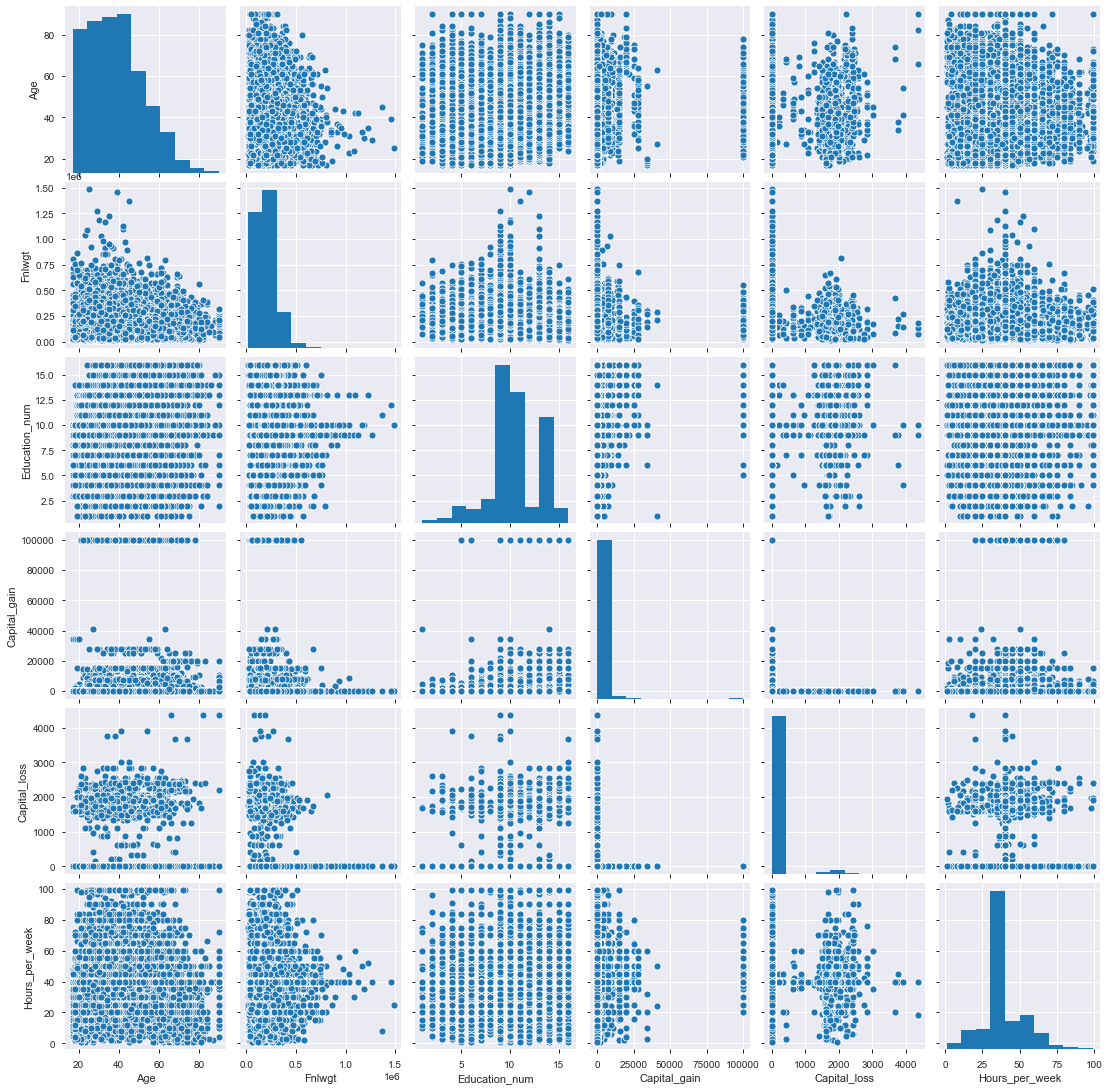

In [12]:
#multi variate analysis between all features
sns.pairplot(df)

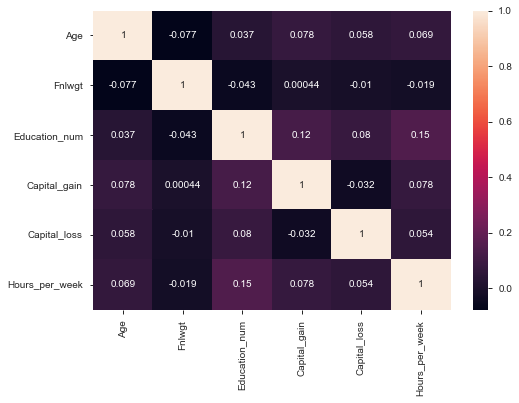

In [13]:
sns.heatmap(df.corr(),annot=True)

# Data Pre-Processing

In [14]:
#label encoding the data

columns = ['Workclass','Education','Marital_status','Occupation','Relationship','Race', 'Sex', 'Native_country', 'Income' ]

for i in columns:
    LE=LabelEncoder()
    df[i] = LE.fit_transform(df[i])

In [15]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
9,37,4,280464,15,10,2,4,0,2,1,0,0,80,39,1


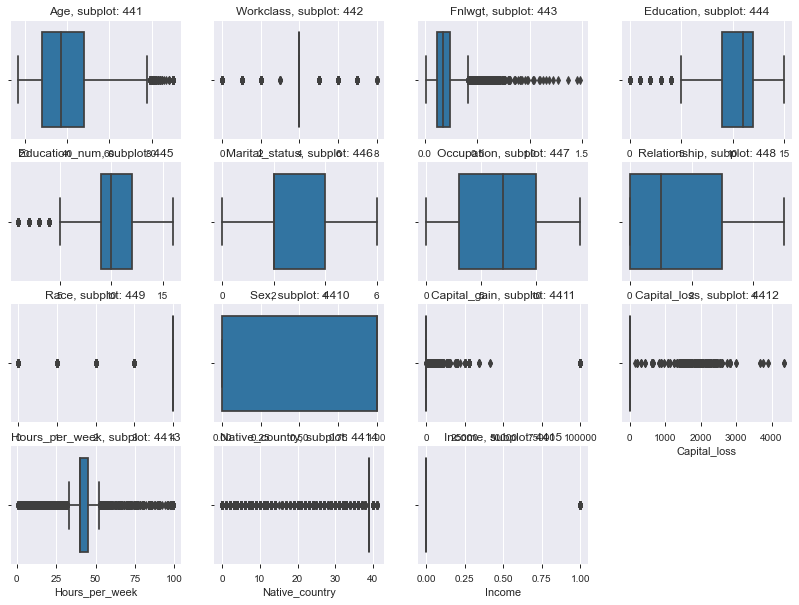

In [16]:
#Outlier check

cols = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country', 'Income']

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,10))

for i in cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(df[i])
    c = c + 1

plt.show()

In [17]:
df.shape

(32560, 15)

In [18]:
#calculate z-scores of x to remove outliers
z_scores = zscore(df) 
abs_z_scores = np. abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [19]:
df=new_df

In [20]:
#splitting dataframe into x and y
x = df.drop('Income', axis = 1)
y = df['Income']

In [21]:
#checking skewness
x.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
dtype: float64

In [22]:
#using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [23]:
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Age               -0.018272
Workclass          0.073827
Fnlwgt            -0.035195
Education         -0.314997
Education_num      0.028000
Marital_status    -0.128651
Occupation        -0.182675
Relationship       0.108587
Race              -2.533505
Sex               -0.684115
Capital_gain       3.069625
Capital_loss      24.623864
Hours_per_week     0.104401
Native_country     0.777698
dtype: float64

In [24]:
x=df_new

In [25]:
#Scale the data in x
std = StandardScaler()
x = std.fit_transform(x)

# Optimal random State

In [26]:
MaxAcc=0
MaxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc= accuracy_score(y_test, predlr)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS=i
print("Highest accuracy acheived at",MaxAcc, "with Random State ", MaxRS)

Highest accuracy acheived at 0.8409919766593728 with Random State  856


In [27]:
#train test split at best random state
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.30, random_state=856)

# Testing Models

In [28]:
models = {"Logistic": LogisticRegression(),
              "KNN": KNeighborsClassifier(),
              "DTC": DecisionTreeClassifier(),
              "RF": RandomForestClassifier(),
              "NB": GaussianNB(),
              "GBM": GradientBoostingClassifier(),
              "XGB": XGBClassifier(),
              "SVM": SVC()}

In [29]:
seed=50
results = []
model_names = []
scoring = 'accuracy'
for name, model in models.items():
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    model_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic: 0.823720 (0.010415)
KNN: 0.824917 (0.010741)
DTC: 0.803762 (0.008883)
RF: 0.848992 (0.008339)
NB: 0.766245 (0.006725)
GBM: 0.861393 (0.009805)
[10:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

We see our top performing model to be : Gradient Boosting Classifier at 86.14% accuracy.

Parameter Tuning

In [44]:
parameters = {"n_estimators":[5,50,250],
    "learning_rate":[0.01,0.1,0.2] }

GCV = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=5)


In [45]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [5, 50, 250]})

In [46]:
GCV.best_params_, GCV.best_score_

({'learning_rate': 0.1, 'n_estimators': 250}, 0.8648846531463581)

In [47]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [48]:
accuracy_score(y_test,GCV_pred)

0.8722343787989302

# Saving the Best Model

In [49]:
import joblib
joblib.dump(GCV.best_estimator_,"Census.pkl")

['Census.pkl']